Part 1 Basline (small data set)

---



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

from xml.dom import minidom

path="/content/gdrive/MyDrive/BenchMark Data Set for Road Signs/annotations/"
count="0"
file = minidom.parse(path+"road"+count+".xml")
Object = file.getElementsByTagName('name')
print(Object[0].firstChild.data)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
trafficlight


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
from skimage.transform import resize
#160 images
data=[]
labels=[]
path="/content/gdrive/My Drive/AdverTrafficIMages/"   #change to group drive
#first 51 images of traffic lights
for x in range(52):
  x=str(x)
  image=plt.imread(path+"road"+x+".png")
  image=resize(image,(200,200))
  image=np.array(image)
  #print(image)
  data.append(image)
  labels.append(1)

#stop sign
for x in range(52,100):
  x=str(x)
  image=plt.imread(path+"road"+x+".png")
  image=resize(image,(200,200))
  image=np.array(image)
  #print(image)
  data.append(image)
  labels.append(2)
#speed sign

for x in range(100,122):
  x=str(x)
  image=plt.imread(path+"road"+x+".png")
  image=resize(image,(200,200))
  image=np.array(image)
  #print(image)
  data.append(image)
  labels.append(3)

#crosswalk
for x in range(122,159):
  x=str(x)
  image=plt.imread(path+"road"+x+".png")
  image=resize(image,(200,200))
  image=np.array(image)
  #print(image)
  data.append(image)
  labels.append(4)

data=np.array(data)
labels=np.array(labels)

X_train,X_test,Y_train,Y_test=train_test_split(data,labels,test_size=0.1,random_state=42)

# X is image, Y is label. Random state 42 and test size is 10%, small dataset
Y_train=to_categorical(Y_train,5)
Y_test=to_categorical(Y_test,5)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:

#Build CNN
model=Sequential()
model.add(Conv2D(filters=26,kernel_size=(3,3),padding='same',activation='relu',input_shape=X_train.shape[1:]))
model.add(Flatten())
model.add(Dense(5, activation='softmax'))

In [ ]:

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
epochs = 10

history = model.fit(X_train, Y_train, batch_size=6, epochs=epochs, validation_data=(X_test, Y_test))


Epoch 1/10
24/24 [==============================] - 20s 184ms/step - loss: 45.8173 - accuracy: 0.2801 - val_loss: 5.0500 - val_accuracy: 0.3125
Epoch 2/10
24/24 [==============================] - 4s 159ms/step - loss: 5.2630 - accuracy: 0.4202 - val_loss: 1.5406 - val_accuracy: 0.4375
Epoch 3/10
24/24 [==============================] - 4s 158ms/step - loss: 1.1836 - accuracy: 0.5570 - val_loss: 1.0228 - val_accuracy: 0.6250
Epoch 4/10
24/24 [==============================] - 4s 157ms/step - loss: 0.8508 - accuracy: 0.7177 - val_loss: 1.0683 - val_accuracy: 0.6250
Epoch 5/10
24/24 [==============================] - 4s 157ms/step - loss: 0.5403 - accuracy: 0.7814 - val_loss: 1.0698 - val_accuracy: 0.7500
Epoch 6/10
24/24 [==============================] - 4s 156ms/step - loss: 0.4565 - accuracy: 0.8523 - val_loss: 1.0233 - val_accuracy: 0.6875
Epoch 7/10
24/24 [==============================] - 4s 158ms/step - loss: 0.2062 - accuracy: 0.9298 - val_loss: 1.2516 - val_accuracy: 0.6875
Epoc

In [ ]:

pred = model.predict_classes(X_test)
model.evaluate(X_test,Y_test)
pretty=[]
for x in pred:
  if x==1:
    pretty.append("Traffic Light")
  elif x==2:
     pretty.append("Stop Sign")
  elif x==3:
     pretty.append("Speed Sign")
  elif x==4:
     pretty.append("CrossWalk Sign")
w=100
h=100
fig=plt.figure(figsize=(48, 48))
columns = 17
rows = 7
for i in range(6, 16):
    fig.add_subplot(rows, columns,i)
    plt.imshow(X_test[i])
plt.show()
print(pretty[6:18])


NameError: ignored

In [ ]:
##Load saved model. remove comments to save
from keras import models
from google.colab import drive
drive.mount('/content/gdrive')
#!ls /content/gdrive/MyDrive/
#model.save("/content/gdrive/My Drive/Model" )
from tensorflow import keras
model = keras.models.load_model('/content/gdrive/My Drive/Model/')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 200, 200, 26)      962       
_________________________________________________________________
flatten_8 (Flatten)          (None, 1040000)           0         
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 5200005   
Total params: 5,200,967
Trainable params: 5,200,967
Non-trainable params: 0
_________________________________________________________________
(5, 200, 200, 4)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


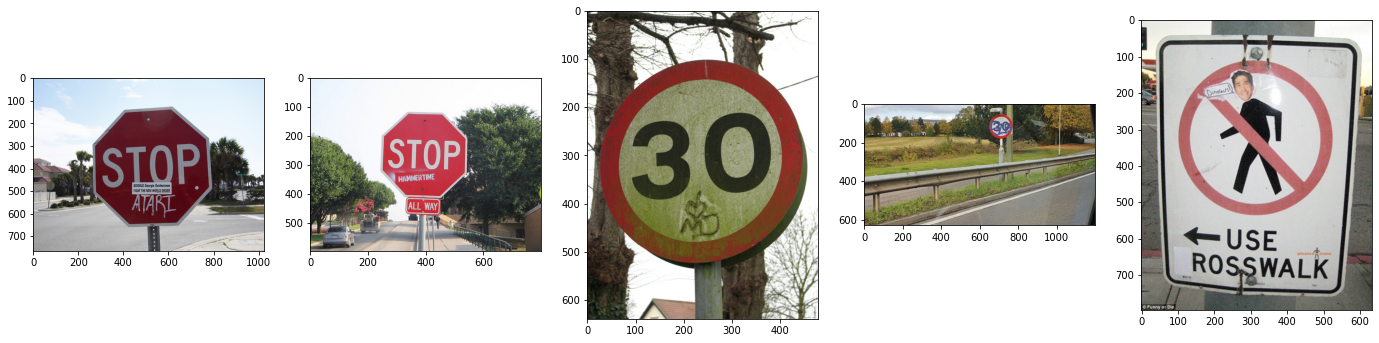

[2 2 2 1 1]
['Stop Sign', 'Stop Sign', 'Stop Sign', 'Traffic Light', 'Traffic Light']


In [ ]:
drive.mount('/content/gdrive')
from google.colab import drive
import matplotlib.pyplot as plt
from skimage.transform import resize
import numpy as np
from keras.utils import to_categorical
path="/content/gdrive/My Drive/fooling/fooling"  
data=[]
labels=[]
fooling1=plt.imread(path+"1.jpg")
fooling1=resize(fooling1,(200,200,4))
image1=np.array(fooling1)
data.append(image1)
labels.append(2)

fooling2=plt.imread(path+"2.jpg")
fooling2=resize(fooling2,(200,200,4))
image2=np.array(fooling2)
data.append(image2)
labels.append(2)

fooling3=plt.imread(path+"3.jpg")
fooling3=resize(fooling2,(200,200,4))
image3=np.array(fooling3)
data.append(image3)
labels.append(3)

fooling4=plt.imread(path+"4.jpg")
fooling4=resize(fooling4,(200,200,4))
image4=np.array(fooling4)
data.append(image4)
labels.append(3)

fooling5=plt.imread(path+"5.jpg")
fooling5=resize(fooling5,(200,200,4))
image5=np.array(fooling5)
data.append(image5)
labels.append(4)


data=np.array(data)
labels=np.array(labels)

model.summary()
print(data.shape)

pred2 = model.predict_classes(data)
#model.evaluate(data,labels)
pretty=[]
for x in pred2:
  if x==1:
    pretty.append("Traffic Light")
  elif x==2:
     pretty.append("Stop Sign")
  elif x==3:
     pretty.append("Speed Sign")
  elif x==4:
     pretty.append("CrossWalk Sign")

w=100
h=100
fig=plt.figure(figsize=(24, 24))
columns = 5
rows = 1
for i in range(1, 6 ):
    fig.add_subplot(rows, columns, i)
    i=str(i)
    img=plt.imread(path+i+".jpg")
    plt.imshow(img)
plt.show()
print(pred2)
print(pretty)




---


PART 2
# Create bigger CNN with more images

In [ ]:
from google.colab import drive
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,AveragePooling2D
from skimage.transform import resize
data2=[]
labels2=[]
drive.mount('/content/gdrive')
path="/content/gdrive/My Drive/AdverTrafficIMages/"   #change to group drive
#first 51 images of traffic lights
for x in range(52):
  x=str(x)
  image=plt.imread(path+"road"+x+".png")
  image=resize(image,(200,200))
  image=np.array(image)
  data2.append(image)
  labels2.append(1)

  image2=plt.imread(path+"road"+x+".png")
  image2=resize(image,(250,250))
  image2=np.array(image2)
  data2.append(image)
  labels2.append(1)


#stop sign
for x in range(52,100):
  x=str(x)
  image=plt.imread(path+"road"+x+".png")
  image=resize(image,(200,200))
  image=np.array(image)
  data2.append(image)
  labels2.append(2)

  image2=plt.imread(path+"road"+x+".png")
  image2=resize(image,(250,250))
  image2=np.array(image2)
  data2.append(image)
  labels2.append(2)
#speed sign

for x in range(100,122):
  x=str(x)
  image=plt.imread(path+"road"+x+".png")
  image=resize(image,(200,200))
  image=np.array(image)
  #print(image)
  data2.append(image)
  labels2.append(3)

  image2=plt.imread(path+"road"+x+".png")
  image2=resize(image,(250,250))
  image2=np.array(image2)
  data2.append(image)
  labels2.append(3)

#crosswalk
for x in range(122,159):
  x=str(x)
  image=plt.imread(path+"road"+x+".png")
  image=resize(image,(200,200))
  image=np.array(image)
  #print(image)
  data2.append(image)
  labels2.append(4)
  
  image2=plt.imread(path+"road"+x+".png")
  image2=resize(image,(250,250))
  image2=np.array(image2)
  data2.append(image)
  labels2.append(4)
data2=np.array(data2)
labels2=np.array(labels2)

X_train2,X_test2,Y_train2,Y_test2=train_test_split(data2,labels2,test_size=0.2,random_state=42)

# X is image, Y is label. Random state 42 and test size is 20%, small dataset
Y_train2=to_categorical(Y_train2,5)
Y_test2=to_categorical(Y_test2,5)



Mounted at /content/gdrive


In [ ]:
print(len(data2))

318


In [ ]:


#Build CNN2
model_bigger=Sequential()
model_bigger.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=X_train2.shape[1:]))
model_bigger.add(AveragePooling2D(pool_size=(3,3)))
model_bigger.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model_bigger.add(AveragePooling2D(pool_size=(3,3)))
model_bigger.add(Dropout(0.25))



model_bigger.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
epochs = 15

history = model_bigger.fit(X_train2, Y_train2, batch_size=32, epochs=epochs, validation_data=(X_test2, Y_test2))

Epoch 1/15
8/8 [==============================] - 7s 885ms/step - loss: 2.7808 - accuracy: 0.3386 - val_loss: 1.5079 - val_accuracy: 0.2812
Epoch 2/15
8/8 [==============================] - 7s 872ms/step - loss: 1.5196 - accuracy: 0.4370 - val_loss: 1.1593 - val_accuracy: 0.4688
Epoch 3/15
8/8 [==============================] - 7s 870ms/step - loss: 1.0319 - accuracy: 0.5551 - val_loss: 1.0341 - val_accuracy: 0.5938
Epoch 4/15
8/8 [==============================] - 7s 873ms/step - loss: 0.8756 - accuracy: 0.6890 - val_loss: 0.9778 - val_accuracy: 0.5625
Epoch 5/15
8/8 [==============================] - 7s 869ms/step - loss: 0.7443 - accuracy: 0.7520 - val_loss: 0.8302 - val_accuracy: 0.6250
Epoch 6/15
8/8 [==============================] - 7s 866ms/step - loss: 0.5879 - accuracy: 0.8268 - val_loss: 0.7352 - val_accuracy: 0.7188
Epoch 7/15
8/8 [==============================] - 7s 873ms/step - loss: 0.4874 - accuracy: 0.8740 - val_loss: 0.6992 - val_accuracy: 0.6875
Epoch 8/15
8/8 [====

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


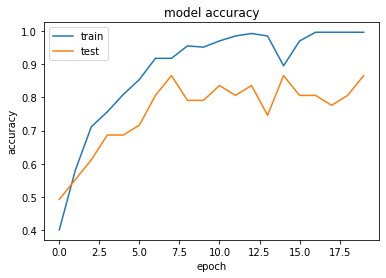

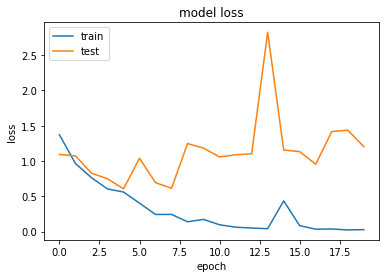

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from keras import models
import keras
from google.colab import drive
drive.mount('/content/gdrive')
#!ls /content/gdrive/MyDrive/
#model2.save("/content/gdrive/My Drive/Model2" )
#from tensorflow import keras


#orginally called model2
model2 = keras.models.load_model('/content/gdrive/My Drive/Model2/')

Mounted at /content/gdrive


3/3 [==============================] - 0s 121ms/step - loss: 0.2839 - accuracy: 0.9403


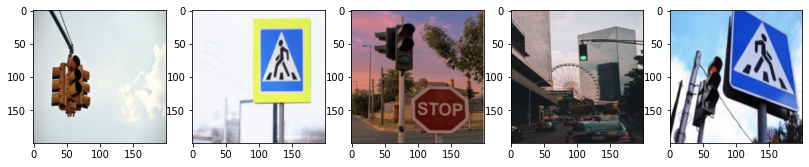

['Stop Sign', 'Stop Sign', 'Stop Sign', 'Stop Sign', 'Stop Sign']


In [ ]:
pred2 = np.argmax(model2.predict(X_train2), axis=-1)
model2.evaluate(X_test2,Y_test2)
pretty2=[]
for x in pred2:
  if x==1:
    pretty2.append("Traffic Light")
  elif x==2:
     pretty2.append("Stop Sign")
  elif x==3:
     pretty2.append("Speed Sign")
  elif x==4:
     pretty2.append("CrossWalk Sign")
w=100
h=100
fig=plt.figure(figsize=(48, 48))
columns = 17
rows = 7
for i in range(45, 50):
    fig.add_subplot(rows, columns,i)
    plt.imshow(X_test2[i])
plt.show()
print(pretty[45:50])


In [ ]:
drive.mount('/content/gdrive')
from google.colab import drive
import matplotlib.pyplot as plt
from skimage.transform import resize
import numpy as np
from tensorflow.keras.utils import to_categorical
path="/content/gdrive/My Drive/fooling/fooling"  
Fooling_data=[]
Fooling_labels=[]
fooling1=plt.imread(path+"1.png")
fooling1=resize(fooling1,(200,200))

image1=np.array(fooling1)
Fooling_data.append(image1)
Fooling_labels.append(2)

fooling2=plt.imread(path+"2.png")
fooling2=resize(fooling2,(200,200))
image2=np.array(fooling2)
Fooling_data.append(image2)
Fooling_labels.append(2)

fooling3=plt.imread(path+"3.png")
fooling3=resize(fooling3,(200,200))
image3=np.array(fooling3)
Fooling_data.append(image3)
Fooling_labels.append(3)

fooling4=plt.imread(path+"4.png")
fooling4=resize(fooling4,(200,200))
image4=np.array(fooling4)
Fooling_data.append(image4)
Fooling_labels.append(3)


fooling5=plt.imread(path+"5.png")
fooling5=resize(fooling5,(200,200))
image5=np.array(fooling5)
Fooling_data.append(image5)
Fooling_labels.append(4)

fooling6=plt.imread(path+"6.png")
fooling6=resize(fooling6,(200,200))
image6=np.array(fooling6)
Fooling_data.append(image6)
Fooling_labels.append(4)

fooling7=plt.imread(path+"7.png")
fooling7=resize(fooling7,(200,200))
image7=np.array(fooling7)
Fooling_data.append(image7)
Fooling_labels.append(2)

fooling8=plt.imread(path+"8.png")
fooling8=resize(fooling8,(200,200))
image8=np.array(fooling8)
Fooling_data.append(image8)
Fooling_labels.append(2)
 

Fooling_data=np.array(Fooling_data)
Fooling_labels=np.array(Fooling_labels)




model2.summary()





pred3 = np.argmax(model2.predict(Fooling_data), axis=-1)
print(pred3)
pretty3=[]
for x in pred3:
  if x==1:
    pretty3.append("Traffic Light")
  elif x==2:
     pretty3.append("Stop Sign")
  elif x==3:
     pretty3.append("Speed Sign")
  elif x==4:
     pretty3.append("CrossWalk Sign")

w=100
h=100
fig=plt.figure(figsize=(24, 24))
columns = 8
rows = 1
for i in range(1, 9 ):
    fig.add_subplot(rows, columns, i)
    plt.imshow(Fooling_data[i-1])
plt.show()

print("Correct numbers")
print(Fooling_labels)
print(len(Fooling_data ))

print(pred3)
print(pretty3)

NameError: ignored




---


PART 3
# Create bigger CNN with more images and train with fooling images


In [ ]:
from google.colab import drive
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,AveragePooling2D
from skimage.transform import resize
data2=[]
labels2=[]
drive.mount('/content/gdrive')
path="/content/gdrive/My Drive/AdverTrafficIMages/"   #change to group drive
#first 51 images of traffic lights



for x in range(52):
  x=str(x)
  image=plt.imread(path+"road"+x+".png")
  image=resize(image,(200,200))
  image=np.array(image)
  data2.append(image)
  labels2.append(1)

  image2=plt.imread(path+"road"+x+".png")
  image2=resize(image,(250,250))
  image2=np.array(image2)
  data2.append(image)
  labels2.append(1)



#stop sign
for x in range(52,100):
  x=str(x)
  image=plt.imread(path+"road"+x+".png")
  image=resize(image,(200,200))
  image=np.array(image)
  data2.append(image)
  labels2.append(2)

  image2=plt.imread(path+"road"+x+".png")
  image2=resize(image,(250,250))
  image2=np.array(image2)
  data2.append(image)
  labels2.append(2)
#speed sign

for x in range(100,122):
  x=str(x)
  image=plt.imread(path+"road"+x+".png")
  image=resize(image,(200,200))
  image=np.array(image)
  #print(image)
  data2.append(image)
  labels2.append(3)

  image2=plt.imread(path+"road"+x+".png")
  image2=resize(image,(250,250))
  image2=np.array(image2)
  data2.append(image)
  labels2.append(3)

#crosswalk
for x in range(122,159):
  x=str(x)
  image=plt.imread(path+"road"+x+".png")
  image=resize(image,(200,200))
  image=np.array(image)
  #print(image)
  data2.append(image)
  labels2.append(4)
  
  image2=plt.imread(path+"road"+x+".png")
  image2=resize(image,(250,250))
  image2=np.array(image2)
  data2.append(image)
  labels2.append(4)





Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


318
[86, 64, 96, 73, 80, 90, 103, 112, 107, 113, 118, 126, 130, 135, 132, 153]
334


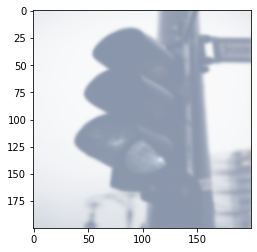

In [ ]:
print(len(data2))
from random import *
random_Numbers=[]


while len(random_Numbers) <= 5:
  w=randint(52,100)
  if w not in random_Numbers:
    random_Numbers.append(w)
    labels2.append(2)

while len(random_Numbers) <= 10:
  y=randint(100,122)
  if y not in random_Numbers:
    random_Numbers.append(y)
    labels2.append(3)

while len(random_Numbers) <= 15:
  z=randint(122,159)
  if z not in random_Numbers:
    random_Numbers.append(z)
    labels2.append(4)


print(random_Numbers)

blurred=[]
from scipy import ndimage
for x in random_Numbers:
  blurred.append(ndimage.gaussian_filter(data2[x], sigma=1.5) )



data2=data2+blurred
plt.imshow(blurred[1])



data2=np.array(data2)
labels2=np.array(labels2)

X_train2,X_test2,Y_train2,Y_test2=train_test_split(data2,labels2,test_size=0.2,random_state=42)

# X is image, Y is label. Random state 42 and test size is 20%, small dataset
Y_train2=to_categorical(Y_train2,5)
Y_test2=to_categorical(Y_test2,5)
print(len(data2))

In [ ]:

#Build CNN2
model2=Sequential()
model2.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=X_train2.shape[1:]))
model2.add(AveragePooling2D(pool_size=(3,3)))
model2.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model2.add(AveragePooling2D(pool_size=(3,3)))
model2.add(Dropout(0.25))


model2.add(Flatten())

model2.add(Dense(5, activation='softmax'))


model2.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
epochs = 20

history = model2.fit(X_train2, Y_train2, batch_size=1, epochs=epochs, validation_data=(X_test2, Y_test2))

Epoch 1/20
267/267 [==============================] - 10s 34ms/step - loss: 1.3718 - accuracy: 0.4007 - val_loss: 1.0927 - val_accuracy: 0.4925
Epoch 2/20
267/267 [==============================] - 9s 34ms/step - loss: 0.9646 - accuracy: 0.5805 - val_loss: 1.0726 - val_accuracy: 0.5522
Epoch 3/20
267/267 [==============================] - 9s 34ms/step - loss: 0.7636 - accuracy: 0.7116 - val_loss: 0.8277 - val_accuracy: 0.6119
Epoch 4/20
267/267 [==============================] - 9s 34ms/step - loss: 0.6048 - accuracy: 0.7566 - val_loss: 0.7489 - val_accuracy: 0.6866
Epoch 5/20
267/267 [==============================] - 9s 34ms/step - loss: 0.5612 - accuracy: 0.8090 - val_loss: 0.6063 - val_accuracy: 0.6866
Epoch 6/20
267/267 [==============================] - 9s 34ms/step - loss: 0.4033 - accuracy: 0.8539 - val_loss: 1.0386 - val_accuracy: 0.7164
Epoch 7/20
267/267 [==============================] - 9s 34ms/step - loss: 0.2432 - accuracy: 0.9176 - val_loss: 0.6938 - val_accuracy: 0.806

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


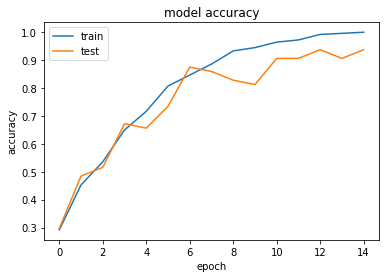

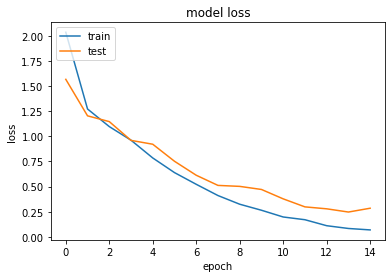

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
from keras import models
import keras
from google.colab import drive
drive.mount('/content/gdrive')
#!ls /content/gdrive/MyDrive/
#model2.save("/content/gdrive/My Drive/Model2" )
#from tensorflow import keras
model2 = keras.models.load_model('/content/gdrive/My Drive/Model2/')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


3/3 [==============================] - 1s 174ms/step - loss: 0.6252 - accuracy: 0.8485
[1 2 2 1 1 1 1 1 4 3 2 4 1 1 4 2 2 4 1 2 1 1 2 4 1 4 4 4 4 3 4 4 3 3 4 1 2
 1 1 1 2 4 2 4 4 1 3 4 2 2 1 1 1 1 1 1 1 4 4 2 1 1 1 4 1 4]


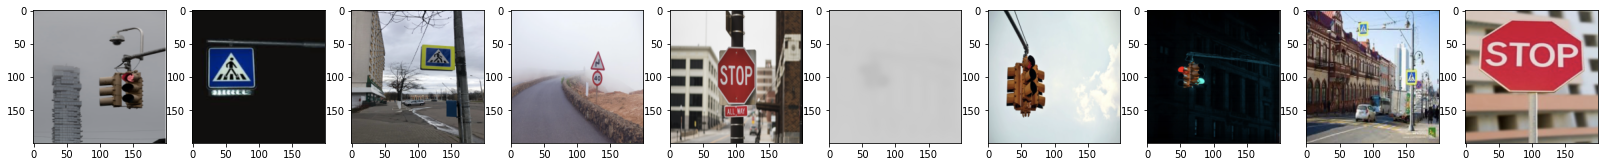

['Traffic Light', 'Traffic Light', 'CrossWalk Sign', 'Speed Sign', 'Stop Sign', 'CrossWalk Sign', 'Traffic Light', 'Traffic Light', 'CrossWalk Sign', 'Stop Sign']


In [ ]:
pred2  = np.argmax(model2.predict(X_test2), axis=-1)
model2.evaluate(X_test2,Y_test2)
print(pred2)
pretty2=[]
for x in pred2:
  if x==1:
    pretty2.append("Traffic Light")
  elif x==2:
     pretty2.append("Stop Sign")
  elif x==3:
     pretty2.append("Speed Sign")
  elif x==4:
     pretty2.append("CrossWalk Sign")
w=100
h=100
fig=plt.figure(figsize=(48, 48))
columns = 17
rows = 7
for i in range(6, 16):
    fig.add_subplot(rows, columns,i)
    plt.imshow(X_test2[i])
  
plt.show()
print(pretty2[6:16])


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 200, 200, 32)      1184      
_________________________________________________________________
average_pooling2d_17 (Averag (None, 66, 66, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 66, 66, 32)        9248      
_________________________________________________________________
average_pooling2d_18 (Averag (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 22, 22, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 15488)            

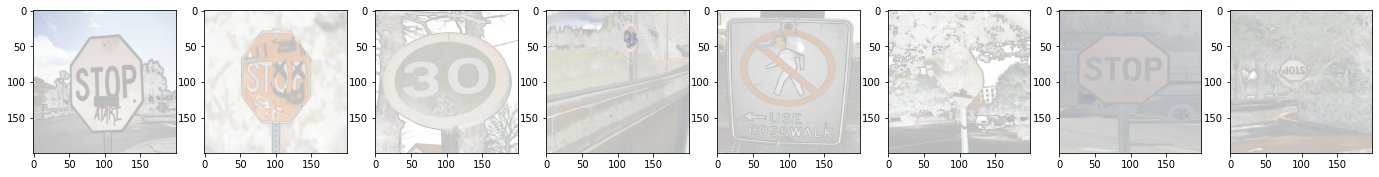

Correct numbers
[2 2 3 3 4 4 2 2]
8
[2 4 3 4 4 4 4 2]
['Stop Sign', 'CrossWalk Sign', 'Speed Sign', 'CrossWalk Sign', 'CrossWalk Sign', 'CrossWalk Sign', 'CrossWalk Sign', 'Stop Sign']


In [ ]:
drive.mount('/content/gdrive')
from google.colab import drive
import matplotlib.pyplot as plt
from skimage.transform import resize
import numpy as np
from tensorflow.keras.utils import to_categorical
path="/content/gdrive/My Drive/fooling/fooling"  
Fooling_data=[]
Fooling_labels=[]
fooling1=plt.imread(path+"1.png")
fooling1=resize(fooling1,(200,200,4))

image1=np.array(fooling1)
Fooling_data.append(image1)
Fooling_labels.append(2)

fooling2=plt.imread(path+"2.png")
fooling2=resize(fooling2,(200,200,4))
image2=np.array(fooling2)
Fooling_data.append(image2)
Fooling_labels.append(2)

fooling3=plt.imread(path+"3.png")
fooling3=resize(fooling3,(200,200,4))
image3=np.array(fooling3)
Fooling_data.append(image3)
Fooling_labels.append(3)

fooling4=plt.imread(path+"4.png")
fooling4=resize(fooling4,(200,200,4))
image4=np.array(fooling4)
Fooling_data.append(image4)
Fooling_labels.append(3)


fooling5=plt.imread(path+"5.png")
fooling5=resize(fooling5,(200,200,4))
image5=np.array(fooling5)
Fooling_data.append(image5)
Fooling_labels.append(4)

fooling6=plt.imread(path+"6.png")
fooling6=resize(fooling6,(200,200,4))
image6=np.array(fooling6)
Fooling_data.append(image6)
Fooling_labels.append(4)

fooling7=plt.imread(path+"7.png")
fooling7=resize(fooling7,(200,200,4))
image7=np.array(fooling7)
Fooling_data.append(image7)
Fooling_labels.append(2)

fooling8=plt.imread(path+"8.png")
fooling8=resize(fooling8,(200,200,4))
image8=np.array(fooling8)
Fooling_data.append(image8)
Fooling_labels.append(2)
 

Fooling_data=np.array(Fooling_data)
Fooling_labels=np.array(Fooling_labels)




model2.summary()



pred3 = np.argmax(model2.predict(Fooling_data), axis=-1)
print(pred3)
pretty3=[]
for x in pred3:
  if x==1:
    pretty3.append("Traffic Light")
  elif x==2:
     pretty3.append("Stop Sign")
  elif x==3:
     pretty3.append("Speed Sign")
  elif x==4:
     pretty3.append("CrossWalk Sign")

w=100
h=100
fig=plt.figure(figsize=(24, 24))
columns = 8
rows = 1
for i in range(1, 9 ):
    fig.add_subplot(rows, columns, i)
    plt.imshow(Fooling_data[i-1])
plt.show()

print("Correct numbers")
print(Fooling_labels)
print(len(Fooling_data ))

print(pred3)
print(pretty3)

In [ ]:
from keras import models
import keras
from google.colab import drive
drive.mount('/content/gdrive')
#!ls /content/gdrive/MyDrive/
#model2.save("/content/gdrive/My Drive/Mode_86" )
#from tensorflow import keras
#model_86 = keras.models.load_model('/content/gdrive/My Drive/Mode_86/')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
INFO:tensorflow:Assets written to: /content/gdrive/My Drive/Mode_86/assets
